In [1]:
from xgboost import plot_importance
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.api import Logit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import f1_score, roc_curve, auc
from sklearn.svm import SVC
from sklearn.metrics import f1_score, roc_curve, auc,roc_auc_score
from sklearn.neighbors import KNeighborsClassifier

import scipy.stats
from scipy import stats
%matplotlib inline
matplotlib.rc('font',family = 'Malgun Gothic')

In [2]:
# 전처리
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler

# 머신러닝 알고리즘
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

# 모델 튜닝 및 평가
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn import model_selection
import statsmodels.api as sm
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
import scipy.stats
from scipy import stats

In [3]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [4]:
import warnings
warnings.filterwarnings(action='ignore')

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler

In [6]:
df_raw = pd.read_csv("Dataset_all.csv")
df_raw.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
# 더미 변수화
df_raw[['Ox_Chamber']]=df_raw[['Ox_Chamber']].astype(str)
df_raw[['photo_soft_Chamber']]=df_raw[['photo_soft_Chamber']].astype(str)
df_raw[['lithography_Chamber']]=df_raw[['lithography_Chamber']].astype(str)
df_raw[['Etching_Chamber']]=df_raw[['Etching_Chamber']].astype(str)
df_raw[['Chamber_Num']]=df_raw[['Chamber_Num']].astype(str)
df_raw[['Wavelength']]=df_raw[['Wavelength']].astype(str)

# wet, dry 구분
# df_raw.loc[df_raw['type']=='dry','type']=0
# df_raw.loc[df_raw['type']=='wet','type']=1

# Vapor / H2O, O2 구분
df_raw.loc[df_raw['Vapor']=='H2O','Vapor']=0
df_raw.loc[df_raw['Vapor']=='O2','Vapor']=1

# Wavelength 365, 405, 436
df_raw.loc[df_raw['Wavelength']=='365','Wavelength']=0
df_raw.loc[df_raw['Wavelength']=='405','Wavelength']=1
df_raw.loc[df_raw['Wavelength']=='436','Wavelength']=2


# 필요 없는 변수 material, current, lamp, chamber, type제거
# df_list_before=['Temp_OXid', 'Vapor', 'ppm','Pressure', 'Oxid_time', 'thickness',
#         'resist_target', 'N2_HMDS', 'pressure_HMDS', 'temp_HMDS','temp_HMDS_bake', 'time_HMDS_bake', 'spin1', 'spin2', 'spin3','photoresist_bake', 'temp_softbake', 'time_softbake',
#         'Line_CD','Wavelength', 'Resolution', 'Energy_Exposure',
#         'Thin F4','Thin F2','Thin F3','Thin F1', 'Temp_Etching','Source_Power', 'Selectivity',
#         'Flux60s', 'Flux90s', 'Flux160s', 'Flux480s','Flux840s', 'input_Energy', 'Temp_implantation','Furance_Temp', 'RTA_Temp']

# df_dummy=pd.get_dummies(df_raw[df_list_before])

# # 불량판단 기준 달라질 것. 이 파라미터에 따른 성능 생각할 필요
# Y_wet.loc[Y_wet.Target<183]=0
# Y_wet.loc[Y_wet.Target>=183]=1
# Y_dry.loc[Y_dry.Target<183]=0
# Y_dry.loc[Y_dry.Target>=183]=1
# len(X),len(Y)
# df_train_x,df_test_x,df_train_y,df_test_y = train_test_split(X,Y,test_size = 0.3,random_state = 1234)

In [8]:
df_raw.loc[df_raw.Target>=183,'Quality']=1
df_raw.loc[df_raw.Target<183,'Quality']=0

In [9]:
# 제일 좋은 것 같은데
imp_features=['Temp_OXid', 'Thin F4', 'Thin F2', 'Flux480s', 'Source_Power',
        'thickness', 'Pressure', 'Energy_Exposure',
       'photoresist_bake', 'spin2', 'temp_HMDS_bake','Temp_implantation']
df_dummy=pd.get_dummies(df_raw[imp_features])
# ppm 제거

In [10]:
df_train_x,df_test_x,df_train_y,df_test_y = train_test_split(df_dummy,df_raw['Quality'],test_size = 0.3,random_state = 1234)

In [11]:
smote = SMOTE(random_state=0)

In [12]:
X_train, Y_train = smote.fit_resample(df_train_x, df_train_y)
X_test, Y_test = smote.fit_resample(df_test_x, df_test_y)

In [13]:
df_test_x_1 = pd.DataFrame()
df_test_x_1 = df_test_x.copy()
range_1 = [] #Temp_Oxid
range_2 = [] #Pressure
range_3 = [] #temp_HMDS_bake
range_4 = [] #photoresist_bake
range_5 = [] #spin2
range_6 = [] #Temp_implantation
for i in range(1, 250):
    range_1.append(random.uniform(1282.139,1310.709))
    range_2.append(random.uniform(0.180,0.193))
    range_3.append(random.uniform(207.765,209.521))
    range_4.append(random.uniform(1282.139,1310.709))
    range_5.append(random.uniform(4105.862,4208.676))
    range_6.append(random.uniform(97.744,100.22))
pd.set_option('display.max_row', None)
pd.set_option('display.max_columns', None)

In [14]:
range1 = pd.DataFrame()
range2 = pd.DataFrame()
range3 = pd.DataFrame()
range4 = pd.DataFrame()
range5 = pd.DataFrame()
range6 = pd.DataFrame()
range1 = range_1
range2 = range_2
range3 = range_3
range4 = range_4
range5 = range_5
range6 = range_6

In [15]:
df_test_x_1['Temp_OXid'] = range1
df_test_x_1['Pressure'] = range2
df_test_x_1['temp_HMDS_bake'] = range3
df_test_x_1['photoresist_bake'] = range4
df_test_x_1['spin2'] = range5
df_test_x_1['Temp_implantation'] = range5

In [16]:
df_test_x_1

,Temp_OXid,Thin F4,Thin F2,Flux480s,Source_Power,thickness,Pressure,Energy_Exposure,photoresist_bake,spin2,temp_HMDS_bake,Temp_implantation
326,1283.039086,224.0,3645.0,2.982513e+17,50.431,703.950,0.188705,106.328,1287.598721,4114.452136,209.010998,4114.452136
771,1285.061392,174.0,3635.0,2.993495e+17,51.358,709.835,0.183407,108.407,1295.345214,4128.882103,208.418088,4128.882103
288,1298.920273,387.0,3658.0,2.982403e+17,50.787,706.277,0.185943,111.001,1285.527534,4147.111082,209.379624,4147.111082
230,1295.330480,175.0,3646.0,2.993413e+17,50.185,716.564,0.182832,105.132,1299.506351,4133.533099,209.095745,4133.533099
362,1293.985550,177.0,3634.0,3.014882e+17,50.792,709.301,0.190523,106.102,1298.538231,4145.079284,209.015239,4145.079284
72,1291.160637,456.0,3638.0,2.981188e+17,51.156,716.988,0.183092,107.687,1290.775297,4207.674006,207.768278,4207.674006
415,1303.648938,304.0,3625.0,2.971368e+17,51.062,714.203,0.189039,106.617,1295.886343,4141.742308,209.295230,4141.742308
301,1301.993083,448.0,3654.0,2.985401e+17,51.969,726.396,0.188394,109.447,1287.932507,4148.291189,209.450795,4148.291189
746,1295.683404,169.0,3668.0,2.999457e+17,51.236,726.633,0.189649,107.961,1304.565290,4190.371009,208.145035,4190.371009
406,1299.361581,366.0,3654.0,3.013019e+17,50.583,697.237,0.192303,107.421,1310.580455,4157.284471,209.249541,4157.284471


In [17]:
df_test_x

,Temp_OXid,Thin F4,Thin F2,Flux480s,Source_Power,thickness,Pressure,Energy_Exposure,photoresist_bake,spin2,temp_HMDS_bake,Temp_implantation
326,1267.846723,224.0,3645.0,2.982513e+17,50.431,703.950,0.217,106.328,5.063,4049.123,202.456,101.078
771,871.477974,174.0,3635.0,2.993495e+17,51.358,709.835,0.213,108.407,5.065,4074.581,203.729,103.396
288,1159.860168,387.0,3658.0,2.982403e+17,50.787,706.277,0.202,111.001,5.004,4036.214,205.521,100.362
230,1282.303070,175.0,3646.0,2.993413e+17,50.185,716.564,0.215,105.132,5.021,4017.361,200.868,100.463
362,1280.077304,177.0,3634.0,3.014882e+17,50.792,709.301,0.216,106.102,5.103,4103.032,205.152,101.980
72,1103.547945,456.0,3638.0,2.981188e+17,51.156,716.988,0.210,107.687,5.107,3999.030,202.072,102.933
415,1287.435437,304.0,3625.0,2.971368e+17,51.062,714.203,0.203,106.617,5.067,4010.001,197.046,103.891
301,1130.769716,448.0,3654.0,2.985401e+17,51.969,726.396,0.196,109.447,4.964,4071.649,204.080,103.749
746,1274.667489,169.0,3668.0,2.999457e+17,51.236,726.633,0.224,107.961,4.904,3925.230,196.262,103.090
406,1054.787096,366.0,3654.0,3.013019e+17,50.583,697.237,0.210,107.421,5.076,4052.404,200.051,105.080


In [18]:
xgb_model = XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=5, max_leaves=1, min_child_weight=1,
                               monotone_constraints='()',
                               n_estimators=100, n_jobs=4, num_parallel_tree=1,
                               process_type='default', random_state=1234,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=0.8, tree_method='exact',
                               validate_parameters=1, verbosity=None)

In [19]:
accuracy_test=[]
precision=[]
recall=[]
F1=[]

## XGB

In [20]:
xgb_model.fit(X_train,Y_train)

[22:40:02] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              max_leaves=1, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, process_type='default', random_state=1234,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [21]:
y_pred = xgb_model.predict_proba(X_test)
threshold=0.2
y_pred[y_pred[:,1]>=threshold]=1
y_pred[y_pred[:,1]<threshold]=0
# print('Confustion matrix : \n{}'.format(confusion_matrix(df_test_y, y_pred[:,1])))
print('Confustion matrix : \n{}'.format(confusion_matrix(Y_test, y_pred[:,1])))
print(accuracy_score(Y_test, y_pred[:,1]))
print(precision_score(Y_test, y_pred[:,1]))
print(recall_score(Y_test, y_pred[:,1]))
print(f1_score(Y_test, y_pred[:,1]))

Confustion matrix : 
[[198  26]
 [ 31 193]]
0.8727678571428571
0.8812785388127854
0.8616071428571429
0.8713318284424378


In [22]:
accuracy_test.append(accuracy_score(Y_test, y_pred[:,1]))
precision.append(precision_score(Y_test, y_pred[:,1]))
recall.append(recall_score(Y_test, y_pred[:,1]))
F1.append(f1_score(Y_test, y_pred[:,1]))

## GB

In [23]:
gb_fianl = GradientBoostingClassifier(ccp_alpha=0.0,
                            criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='deviance',
                            max_depth=3, max_features=None,
                            max_leaf_nodes=None,
                            min_impurity_decrease=0.0,
                            min_impurity_split=None,
                            min_samples_leaf=1,
                            min_samples_split=2,
                            min_weight_fraction_leaf=0.0,
                            n_estimators=100,
                            n_iter_no_change=None,
                            random_state=None, subsample=1.0,
                            tol=0.0001, validation_fraction=0.1,
                            verbose=0, warm_start=False)
gb_fianl.fit(X_train,Y_train)

GradientBoostingClassifier()

In [24]:
y_pred = gb_fianl.predict_proba(X_test)
threshold=0.2
y_pred[y_pred[:,1]>=threshold]=1
y_pred[y_pred[:,1]<threshold]=0
print('Confustion matrix : \n{}'.format(confusion_matrix(Y_test, y_pred[:,1])))
print(accuracy_score(Y_test, y_pred[:,1]))
print(precision_score(Y_test, y_pred[:,1]))
print(recall_score(Y_test, y_pred[:,1]))
print(f1_score(Y_test, y_pred[:,1]))

Confustion matrix : 
[[186  38]
 [ 22 202]]
0.8660714285714286
0.8416666666666667
0.9017857142857143
0.8706896551724138


In [25]:
accuracy_test.append(accuracy_score(Y_test, y_pred[:,1]))
precision.append(precision_score(Y_test, y_pred[:,1]))
recall.append(recall_score(Y_test, y_pred[:,1]))
F1.append(f1_score(Y_test, y_pred[:,1]))

## RF

In [26]:
rf_final=RandomForestClassifier(bootstrap=True,
                       ccp_alpha=0.0,
                       class_weight=None,
                       criterion='gini',
                       max_depth=None,
                       max_features='auto',
                       max_leaf_nodes=None,
                       max_samples=None,
                       min_weight_fraction_leaf=0.0,
                       n_estimators=100,
                       n_jobs=None,
                       oob_score=False,
                       random_state=None,
                       verbose=0,
                       warm_start=False)
rf_final.fit(X_train,Y_train)

RandomForestClassifier()

In [27]:
y_pred = rf_final.predict_proba(X_test)
threshold=0.2
y_pred[y_pred[:,1]>=threshold]=1
y_pred[y_pred[:,1]<threshold]=0
print('Confustion matrix : \n{}'.format(confusion_matrix(Y_test, y_pred[:,1])))
print(accuracy_score(Y_test, y_pred[:,1]))
print(precision_score(Y_test, y_pred[:,1]))
print(recall_score(Y_test, y_pred[:,1]))
print(f1_score(Y_test, y_pred[:,1]))

Confustion matrix : 
[[177  47]
 [  8 216]]
0.8772321428571429
0.8212927756653993
0.9642857142857143
0.8870636550308009


In [28]:
accuracy_test.append(accuracy_score(Y_test, y_pred[:,1]))
precision.append(precision_score(Y_test, y_pred[:,1]))
recall.append(recall_score(Y_test, y_pred[:,1]))
F1.append(f1_score(Y_test, y_pred[:,1]))

## DT

In [29]:
dt_final=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=4,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=20,
                                        min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        random_state=None,
                                        splitter='best')
dt_final.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=20)

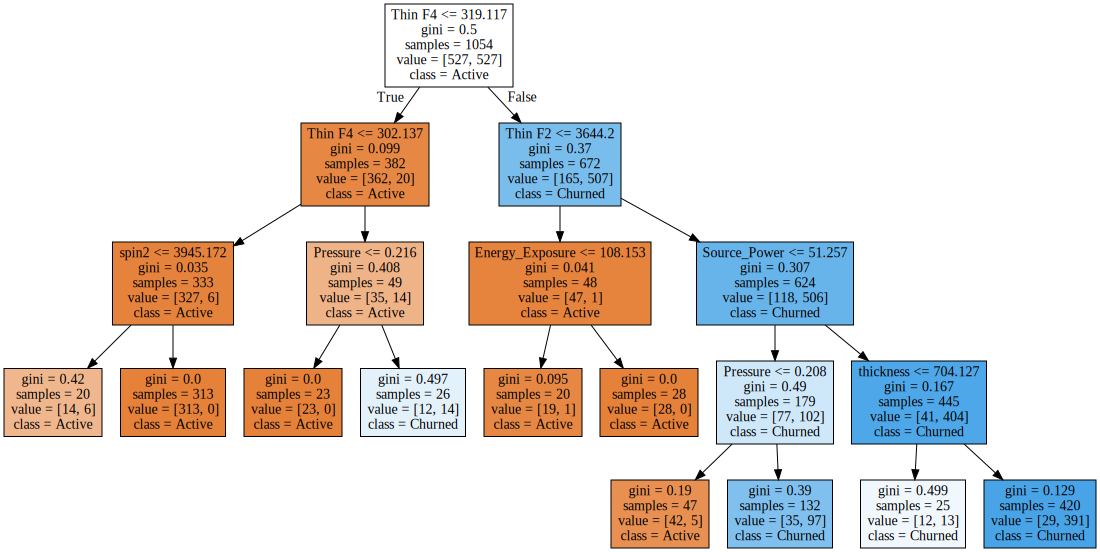

In [30]:
# 깊이가 6인 모델
feature_names = df_train_x.columns

export_graphviz(dt_final, out_file="tree_leaf.dot", class_names = ["Active", "Churned"],
                feature_names = feature_names, impurity = True, filled = True)

with open("tree_leaf.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [31]:
y_pred = dt_final.predict_proba(X_test)
threshold=0.2
y_pred[:,1][y_pred[:,1]>=threshold]=1
y_pred[:,1][y_pred[:,1]<threshold]=0
print('Confustion matrix : \n{}'.format(confusion_matrix(Y_test, y_pred[:,1])))
print(accuracy_score(Y_test, y_pred[:,1]))
print(precision_score(Y_test, y_pred[:,1]))
print(recall_score(Y_test, y_pred[:,1]))
print(f1_score(Y_test, y_pred[:,1]))

Confustion matrix : 
[[169  55]
 [ 25 199]]
0.8214285714285714
0.7834645669291339
0.8883928571428571
0.8326359832635984


In [32]:
accuracy_test.append(accuracy_score(Y_test, y_pred[:,1]))
precision.append(precision_score(Y_test, y_pred[:,1]))
recall.append(recall_score(Y_test, y_pred[:,1]))
F1.append(f1_score(Y_test, y_pred[:,1]))

## SVM

In [33]:
svm_final=SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=True, random_state=None, shrinking=True,
                     tol=0.001, verbose=False)
svm_final.fit(X_train,Y_train)

SVC(probability=True)

In [34]:
y_pred = svm_final.predict_proba(X_test)
threshold=0.2
y_pred[y_pred[:,1]>=threshold]=1
y_pred[y_pred[:,1]<threshold]=0
print('Confustion matrix : \n{}'.format(confusion_matrix(Y_test, y_pred[:,1])))
print(accuracy_score(Y_test, y_pred[:,1]))
print(precision_score(Y_test, y_pred[:,1]))
print(recall_score(Y_test, y_pred[:,1]))
print(f1_score(Y_test, y_pred[:,1]))

Confustion matrix : 
[[  0 224]
 [  0 224]]
0.5
0.5
1.0
0.6666666666666666


In [35]:
accuracy_test.append(accuracy_score(Y_test, y_pred[:,1]))
precision.append(precision_score(Y_test, y_pred[:,1]))
recall.append(recall_score(Y_test, y_pred[:,1]))
F1.append(f1_score(Y_test, y_pred[:,1]))

## 로지스틱 회귀

In [37]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 73 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ox_Chamber           830 non-null    object 
 1   process              830 non-null    object 
 2   type                 830 non-null    object 
 3   Temp_OXid            830 non-null    float64
 4   Vapor                830 non-null    object 
 5   ppm                  830 non-null    float64
 6   Pressure             830 non-null    float64
 7   Oxid_time            830 non-null    int64  
 8   thickness            830 non-null    float64
 9   No_Die               830 non-null    object 
 10  Lot_Num_x            830 non-null    int64  
 11  Wafer_Num_x          830 non-null    int64  
 12  Datetime_x           830 non-null    object 
 13  photo_soft_Chamber   830 non-null    object 
 14  process 2            830 non-null    object 
 15  resist_target        830 non-null    flo

In [40]:
df_raw_logit=df_raw[[ 'Thin F4' ,'Thin F2', 'Thin F3', 'Pressure', 'Flux90s' ,'ppm']]
df_raw_logit.rename(columns = {'Thin F1' : 'Thin_F1','Thin F2' : 'Thin_F2','Thin F3' : 'Thin_F3','Thin F4' : 'Thin_F4'}, inplace = True)
df_train_logit_x, df_test_logit_x = train_test_split(df_raw_logit, test_size = 0.3, random_state = 1234)
df_train_logit_y, df_test_logit_y = train_test_split(df_raw['Quality'], test_size = 0.3, random_state = 1234)

In [41]:
X_train_logit, Y_train_logit = smote.fit_resample(df_train_logit_x, df_train_logit_y)
X_test_logit, Y_test_logit = smote.fit_resample(df_test_logit_x, df_test_logit_y)

In [42]:
# from_formula 함수를 이용하여 변수 역할 지정
# 분석 대상 이벤트 = “1”
log_model = Logit.from_formula("""Quality ~ Thin_F4 + Thin_F2 + Thin_F3 + Pressure + Flux90s +
 ppm""", X_train_logit.join(pd.DataFrame(Y_train_logit)))
# 적합
log_result = log_model.fit()
# 결과 출력
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.230123
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                Quality   No. Observations:                 1054
Model:                          Logit   Df Residuals:                     1047
Method:                           MLE   Df Model:                            6
Date:                Thu, 18 Mar 2021   Pseudo R-squ.:                  0.6680
Time:                        22:40:49   Log-Likelihood:                -242.55
converged:                       True   LL-Null:                       -730.58
Covariance Type:            nonrobust   LLR p-value:                1.349e-207
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -345.8710     33.980    -10.179      0.000    -412.471    -279.271
Thin_F4        0.0231      0.

In [43]:
y_pred = log_result.predict(df_test_logit_x)
th = 0.2
# 0과 1의 값을 가진 class로 변환
y_pred_class = (y_pred > th).astype(int)
# 실제 test 데이터의 목표변수와 test 데이터의 예측값 비교
print("Accuracy: {0:.3f}".format(accuracy_score(df_test_logit_y, y_pred_class)))
print("f1: {0:.3f}".format(f1_score(df_test_logit_y, y_pred_class)))
print("recall: {0:.3f}\n".format(recall_score(df_test_logit_y, y_pred_class)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test_logit_y, y_pred_class)))

Accuracy: 0.763
f1: 0.427
recall: 0.880

Confusion Matrix: 
[[168  56]
 [  3  22]]


In [44]:
accuracy_test.append(accuracy_score(df_test_logit_y, y_pred_class))
precision.append(precision_score(df_test_logit_y, y_pred_class))
recall.append(recall_score(df_test_logit_y, y_pred_class))
F1.append(f1_score(df_test_logit_y, y_pred_class))

In [45]:
accuracy_test

[0.8727678571428571,
 0.8660714285714286,
 0.8772321428571429,
 0.8214285714285714,
 0.5,
 0.7630522088353414]

In [46]:
precision

[0.8812785388127854,
 0.8416666666666667,
 0.8212927756653993,
 0.7834645669291339,
 0.5,
 0.28205128205128205]

In [47]:
recall

[0.8616071428571429,
 0.9017857142857143,
 0.9642857142857143,
 0.8883928571428571,
 1.0,
 0.88]

In [48]:
F1

[0.8713318284424378,
 0.8706896551724138,
 0.8870636550308009,
 0.8326359832635984,
 0.6666666666666666,
 0.4271844660194175]

In [49]:
final_model=pd.DataFrame({'accuracy':accuracy_test,'precision':precision,'recall':recall,'F1':F1},index=['XGB','GB','RF','DT','SVM','Logistic'])

In [50]:
final_model.T


,XGB,GB,RF,DT,SVM,Logistic
accuracy,0.872768,0.866071,0.877232,0.821429,0.500000,0.763052
precision,0.881279,0.841667,0.821293,0.783465,0.500000,0.282051
recall,0.861607,0.901786,0.964286,0.888393,1.000000,0.880000
F1,0.871332,0.870690,0.887064,0.832636,0.666667,0.427184
